In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime


# 0. 데이터 로드

In [172]:
df = pd.read_csv('/opt/ml/input/data/FE_total_data.csv')
train = df[df['answerCode']>=0]

In [173]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1
...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1


In [174]:
def percentile(s):
    return round(np.sum(s) / len(s)*100, 2)

# 1. 시험지별 정답률 & 유저별 시험지 정답률

In [175]:
train['testRatio'] = train.groupby('testId').answerCode.transform(percentile)
train

/tmp/ipykernel_4808/2444052298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['testRatio'] = train.groupby('testId').answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27
...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39


In [176]:
train['userBytestRatio'] = train.groupby(['userID', 'testId']).answerCode.transform(percentile)
train

/tmp/ipykernel_4808/2388983110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['userBytestRatio'] = train.groupby(['userID', 'testId']).answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0


# 2. 태그별 정답률 & 유저별 태그 정답률

In [177]:
train['tagRatio'] = train.groupby('KnowledgeTag').answerCode.transform(percentile)
train

/tmp/ipykernel_4808/888055881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tagRatio'] = train.groupby('KnowledgeTag').answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71
...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00


In [178]:
train['userBytagRatio'] = train.groupby(['userID', 'KnowledgeTag']).answerCode.transform(percentile)
train

/tmp/ipykernel_4808/1969313720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['userBytagRatio'] = train.groupby(['userID', 'KnowledgeTag']).answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0
...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0


# 3. 문제별 정답률

In [179]:
train['ItemRatio'] = train.groupby('assessmentItemID').answerCode.transform(percentile)
train

/tmp/ipykernel_4808/3224831556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ItemRatio'] = train.groupby('assessmentItemID').answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0,98.40
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0,96.80
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0,91.60
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0,97.20
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0,94.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0,44.67
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0,64.33
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0,64.00
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0,78.67


# 4.유저별 정답률

In [180]:
train['userRatio'] = train.groupby('userID').answerCode.transform(percentile)
train

/tmp/ipykernel_4808/3629248944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['userRatio'] = train.groupby('userID').answerCode.transform(percentile)


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio,userRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0,98.40,63.09
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0,96.80,63.09
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0,91.60,63.09
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0,97.20,63.09
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0,94.80,63.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0,44.67,55.56
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0,64.33,55.56
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0,64.00,55.56
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0,78.67,55.56


In [181]:
train.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2526690, 2526691, 2526692, 2526693, 2526694, 2526695, 2526696,
            2526697, 2526698, 2526699],
           dtype='int64', length=2525956)

In [182]:
idx = train.index
columns = ['testRatio', 'userBytestRatio', 'tagRatio', 'userBytagRatio', 'ItemRatio', 'userRatio']
for column in tqdm(columns):
    df.loc[idx, column] = train[column]

100%|██████████| 6/6 [00:01<00:00,  5.48it/s]


In [183]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio,userRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0,98.40,63.09
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0,96.80,63.09
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0,91.60,63.09
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0,97.20,63.09
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0,94.80,63.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0,44.67,55.56
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0,64.33,55.56
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0,64.00,55.56
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0,78.67,55.56


In [187]:
df[df['answerCode']<0]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio,userRatio
2989,3,A050133008,A050000133,-1,2020-10-26 13:13:57,5289,2,NaN,NaN,NaN,NaN,NaN,NaN
3660,4,A070146008,A070000146,-1,2020-12-27 02:47:54,9080,2,NaN,NaN,NaN,NaN,NaN,NaN
10860,13,A070111008,A070000111,-1,2020-12-27 04:35:09,9660,2,NaN,NaN,NaN,NaN,NaN,NaN
15278,17,A090064006,A090000064,-1,2020-10-30 05:48:37,2611,2,NaN,NaN,NaN,NaN,NaN,NaN
23531,26,A060135007,A060000135,-1,2020-10-23 11:44:18,1422,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525938,7395,A040122005,A040000122,-1,2020-09-08 02:05:20,10615,2,NaN,NaN,NaN,NaN,NaN,NaN
2526081,7404,A030111005,A030000111,-1,2020-10-13 09:49:18,7636,2,NaN,NaN,NaN,NaN,NaN,NaN
2526282,7416,A050193004,A050000193,-1,2020-10-04 02:44:41,10402,2,NaN,NaN,NaN,NaN,NaN,NaN
2526297,7417,A050193004,A050000193,-1,2020-09-06 13:09:15,10402,2,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#df.to_csv('./ratio_by_all.csv', index=False)

# Feature engineering

In [189]:
df = pd.read_csv('/opt/ml/workspace/EDA/ratio_by_all.csv')
train = df[df['answerCode']>=0]
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio,userRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0,98.40,63.09
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0,96.80,63.09
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0,91.60,63.09
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0,97.20,63.09
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0,94.80,63.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0,44.67,55.56
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0,64.33,55.56
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0,64.00,55.56
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0,78.67,55.56


In [191]:
item_mean_ratio = 65.43
test_mean_ratio = round(train.groupby('testId').mean()['testRatio'].mean(), 2)
tag_mean_ratio  = 61.55

print(f'문제별 평균 정답률:  {item_mean_ratio}%')
print(f'시험지별 평균 정답률: {test_mean_ratio}%')
print(f'태그별 평균 정답률:  {tag_mean_ratio}%')

문제별 평균 정답률:  65.43%
시험지별 평균 정답률: 66.82%
태그별 평균 정답률:  61.55%


In [193]:
feature_by_test = train.drop(['assessmentItemID', 'Timestamp', 'KnowledgeTag',
                            'answerCode','tagRatio','userBytagRatio', 'ItemRatio'], axis=1)
feature_by_test

,userID,testId,dataset,testRatio,userBytestRatio,userRatio
0,0,A060000001,1,95.27,100.0,63.09
1,0,A060000001,1,95.27,100.0,63.09
2,0,A060000001,1,95.27,100.0,63.09
3,0,A060000001,1,95.27,100.0,63.09
4,0,A060000001,1,95.27,100.0,63.09
...,...,...,...,...,...,...
2526695,7441,A030000071,1,66.60,20.0,55.56
2526696,7441,A040000165,1,65.39,100.0,55.56
2526697,7441,A040000165,1,65.39,100.0,55.56
2526698,7441,A040000165,1,65.39,100.0,55.56


### 시험지 Level 라벨링

In [194]:
# Test LV
diff =  feature_by_test['testRatio'] - test_mean_ratio
pre_std = int(diff.min()//10)*10
last_std = int(diff.max()//10+1)*10
LV = (last_std - pre_std)//10

print('[INFO] Labeling for Test Level...')
print(f'[INFO] diff min({round(diff.min(), 2)}), diff max({round(diff.max(), 2)})\n')

for std in tqdm(range(pre_std+10, last_std+1, 10)):
    print(f'[DEBUG] {pre_std:3d} < diff <= {std:3d}  |  Level: {LV}')
    idx = (pre_std < diff) & (diff <= std)
    feature_by_test.loc[idx, 'testLV'] = LV
    pre_std = std
    LV -= 1

print()
print('[INFO] Done!!')
print(f'[INFO] Check all Test Level: {feature_by_test["testLV"].unique()}')

100%|██████████| 7/7 [00:00<00:00, 73.61it/s]

[INFO] Labeling for Test Level...
[INFO] diff min(-33.76), diff max(28.84)

[DEBUG] -40 < diff <= -30  |  Level: 7
[DEBUG] -30 < diff <= -20  |  Level: 6
[DEBUG] -20 < diff <= -10  |  Level: 5
[DEBUG] -10 < diff <=   0  |  Level: 4
[DEBUG]   0 < diff <=  10  |  Level: 3
[DEBUG]  10 < diff <=  20  |  Level: 2
[DEBUG]  20 < diff <=  30  |  Level: 1

[INFO] Done!!
[INFO] Check all Test Level: [1. 2. 3. 4. 5. 6. 7.]


In [195]:
feature_by_test.groupby('testLV').size()

testLV
1.0    134565
2.0    532315
3.0    595844
4.0    484116
5.0    442810
6.0    307013
7.0     29293
dtype: int64

In [196]:
# User LV by Test
diff =  feature_by_test['userBytestRatio'] - feature_by_test['testRatio']
pre_std = int(diff.min()//10)*10
last_std = int(diff.max()//10+1)*10
LV = 1

print('[INFO] Labeling for User Level by Test...')
print(f'[INFO] diff min({round(diff.min(), 2)}), diff max({round(diff.max(), 2)})\n')

for std in tqdm(range(pre_std+10, last_std+1, 10)):
    print(f'[DEBUG] {pre_std:3d} < diff <= {std:3d}  |  Level: {LV}')
    idx = (pre_std < diff) & (diff <= std)
    feature_by_test.loc[idx, 'userLV'] = LV
    pre_std = std
    LV += 1

print()
print('[INFO] Done!!')
print(f'[INFO] Check all User Level: {feature_by_test["userLV"].unique()}')

100%|██████████| 17/17 [00:00<00:00, 99.65it/s] 

[INFO] Labeling for User Level by Test...
[INFO] diff min(-95.66), diff max(66.94)

[DEBUG] -100 < diff <= -90  |  Level: 1
[DEBUG] -90 < diff <= -80  |  Level: 2
[DEBUG] -80 < diff <= -70  |  Level: 3
[DEBUG] -70 < diff <= -60  |  Level: 4
[DEBUG] -60 < diff <= -50  |  Level: 5
[DEBUG] -50 < diff <= -40  |  Level: 6
[DEBUG] -40 < diff <= -30  |  Level: 7
[DEBUG] -30 < diff <= -20  |  Level: 8
[DEBUG] -20 < diff <= -10  |  Level: 9
[DEBUG] -10 < diff <=   0  |  Level: 10
[DEBUG]   0 < diff <=  10  |  Level: 11
[DEBUG]  10 < diff <=  20  |  Level: 12
[DEBUG]  20 < diff <=  30  |  Level: 13
[DEBUG]  30 < diff <=  40  |  Level: 14
[DEBUG]  40 < diff <=  50  |  Level: 15
[DEBUG]  50 < diff <=  60  |  Level: 16
[DEBUG]  60 < diff <=  70  |  Level: 17

[INFO] Done!!


[INFO] Check all User Level: [11. 12. 13.  9.  8.  7. 10.  5.  6. 15. 14. 16. 17.  4.  2.  3.  1.]


In [197]:
feature_by_test.groupby('userLV').size()

userLV
1.0        444
2.0       8372
3.0      22214
4.0      35583
5.0      64609
6.0     105877
7.0     149778
8.0     194616
9.0     232185
10.0    302348
11.0    372604
12.0    426317
13.0    322060
14.0    158375
15.0     87590
16.0     38758
17.0      4226
dtype: int64

In [198]:
feature_by_test['userLVbyTest'] = feature_by_test['testLV']*feature_by_test['userLV']
feature_by_test

,userID,testId,dataset,testRatio,userBytestRatio,userRatio,testLV,userLV,userLVbyTest
0,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
1,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
2,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
3,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
4,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030000071,1,66.60,20.0,55.56,4.0,6.0,24.0
2526696,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0
2526697,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0
2526698,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0


In [199]:
feature_by_test.groupby('userLVbyTest').size()

userLVbyTest
1.0         444
2.0        1400
3.0         503
4.0        7600
5.0         502
6.0        7655
7.0        2418
8.0       11783
9.0       25162
10.0      32554
11.0      33767
12.0      72055
14.0      13508
15.0      18404
16.0      52271
18.0      50421
20.0     103460
21.0      27581
22.0      95769
24.0     211574
25.0      23744
26.0      74129
27.0      66771
28.0      25617
30.0      81764
32.0      35291
33.0     114013
35.0      50145
36.0     151223
39.0     117452
40.0      97453
42.0      65308
44.0      55605
45.0      44628
48.0     114175
49.0       3416
50.0      33724
52.0      59979
54.0      33764
55.0      43982
56.0      64916
60.0     103434
63.0       6017
65.0      45379
66.0      26497
70.0      43349
72.0      20087
75.0      40479
77.0       2971
78.0      23829
80.0      15087
84.0      20700
90.0      20514
91.0       1292
96.0      22583
98.0       1686
102.0      2702
105.0       808
112.0      1088
119.0      1524
dtype: int64

In [200]:
len(feature_by_test['userLVbyTest'].unique())

60

In [201]:
def avgLV(data):
    tests = data['testId'].unique()
    LV = []
    
    for tid in tests:
        LV.append(data[data['testId']==tid]['userLVbyTest'].iloc[0])
    
    return round(np.mean(LV))

In [202]:
user_test_grouby = feature_by_test.groupby('userID').apply(avgLV)
user_test_grouby

userID
0       37
1       58
2       36
3       36
4       44
        ..
7437    15
7438    28
7439    29
7440    19
7441    40
Length: 7442, dtype: int64

In [203]:
for uid in tqdm(user_test_grouby.index):
    feature_by_test.loc[feature_by_test['userID']==uid, 'userAvgLV'] = user_test_grouby.iloc[uid]

100%|██████████| 7442/7442 [00:19<00:00, 379.09it/s]


In [204]:
feature_by_test

,userID,testId,dataset,testRatio,userBytestRatio,userRatio,testLV,userLV,userLVbyTest,userAvgLV
0,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0,37.0
1,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0,37.0
2,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0,37.0
3,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0,37.0
4,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0,37.0
...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030000071,1,66.60,20.0,55.56,4.0,6.0,24.0,40.0
2526696,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0,40.0
2526697,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0,40.0
2526698,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0,40.0


In [205]:
levels = feature_by_test['userAvgLV'].unique()
print(f'[INFO] Num of User AVG Levels: {len(levels)}')
print(f'[INFO] Level(min): {min(levels)}, Level(max): {max(levels)}')
print(f'[INFO] Check all User AVG Level: {sorted(levels)}\n')

levels: [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 82.0, 83.0]
min: 8.0, max: 83.0


In [210]:
df = pd.read_csv('/opt/ml/input/data/FE_total_data.csv')

idx = feature_by_test.index
columns = ['testLV', 'userAvgLV']
for column in tqdm(columns):
    df.loc[idx, column] = feature_by_test[column]

df.rename(columns={'userAvgLV':'userLVbyTest'}, inplace=True)

100%|██████████| 2/2 [00:00<00:00,  5.26it/s]


In [215]:
test = df[df['answerCode']<0]

for idx in tqdm(test.index):
    uid = test.loc[idx, 'userID']
    testid = test.loc[idx, 'testId']
    df.loc[idx, 'userLVbyTest'] = df[df['userID']==uid]['userLVbyTest'].iloc[0]
    df.loc[idx, 'testLV'] = df[df['testId']==testid]['testLV'].iloc[0]

100%|██████████| 744/744 [02:08<00:00,  5.77it/s]


In [217]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testLV,userLVbyTest
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,1.0,37.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,1.0,37.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,1.0,37.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,1.0,37.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,1.0,37.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,4.0,40.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,4.0,40.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,4.0,40.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,4.0,40.0


In [219]:
df = df.sort_values(by=["userID", "Timestamp"]).reset_index(drop=True)
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testLV,userLVbyTest
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,1.0,37.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,1.0,37.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,1.0,37.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,1.0,37.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,1.0,37.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,4.0,40.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,4.0,40.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,4.0,40.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,4.0,40.0


In [263]:
# testLV_df = df.drop('userLVbyTest', axis=1)
# userLV_df = df.drop('testLV', axis=1)
# testLV_df.to_csv('/opt/ml/input/data/FE/testLV.csv', index=False)
# userLV_df.to_csv('/opt/ml/input/data/FE/userLVbyTest.csv', index=False)

In [6]:
corr_user_ratio =  feature_by_test.groupby(['userAvgLV']).mean()
corr_user_ratio = corr_user_ratio.reset_index()
corr_user_ratio['userRatio'].mean()

63.73242575285131

Text(0.5, 1.0, '# of User Level Exposed - Answer Rate')

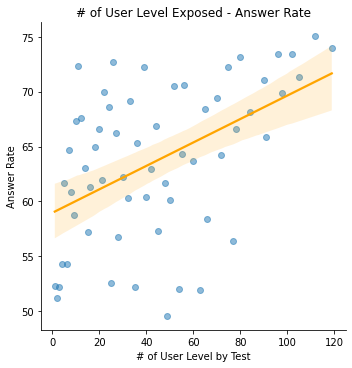

In [9]:
g = sns.lmplot(
    data=corr_user_ratio,
    x = 'userAvgLV',
    y = 'userRatio',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of User Level by Test')
g.set_ylabels('Answer Rate')
#g.set(xlim=(1, 120))

ax = plt.gca()
ax.set_title('# of User Level Exposed - Answer Rate')

# 한 번에 돌리기

In [236]:
import warnings
warnings.filterwarnings(action='ignore')

In [237]:
def percentile(s):
    return round(np.sum(s) / len(s)*100, 2)

print(f'[INFO] This process will take about 3 minutes\n')
# 0. 데이터 로드
print(f'[DEBUG]] Loading Data ...')
df = pd.read_csv('/opt/ml/input/data/FE_total_data.csv')
train = df[df['answerCode']>=0]
print(f'[INFO] Total Data: {len(df)}')
print(f'[INFO] Feature Engineering Data (only answerCode >= 0): {len(train)}')
# 1. 시험지별 정답률 & 유저별 시험지 정답률
print(f'[DEBUG] Calculating correct testRatio and userBytestRatio ...')
train['testRatio'] = train.groupby('testId').answerCode.transform(percentile)
train['userBytestRatio'] = train.groupby(['userID', 'testId']).answerCode.transform(percentile)
# 2. 태그별 정답률 & 유저별 태그 정답률
print(f'[DEBUG] Calculating correct tagRatio and userBytagRatio ...')
train['tagRatio'] = train.groupby('KnowledgeTag').answerCode.transform(percentile)
train['userBytagRatio'] = train.groupby(['userID', 'KnowledgeTag']).answerCode.transform(percentile)
# 3. 문제별 정답률
print(f'[DEBUG] Calculating correct ItemRatio ...')
train['ItemRatio'] = train.groupby('assessmentItemID').answerCode.transform(percentile)
# 4.유저별 정답률
print(f'[DEBUG] Calculating correct userRatio ...')
train['userRatio'] = train.groupby('userID').answerCode.transform(percentile)

print(f'[INFO] Done!!\n')
# train.to_csv('./ratio_by_all.csv', index=False)
# print(f'[INFO] save ratio_by_all.csv ...')

[INFO] This process will take about 3 minutes

[DEBUG]] Loading Data ...
[INFO] Total Data: 2526700
[INFO] Feature Engineering Data (only answerCode > 1): 2525956
[DEBUG] Calculating correct testRatio and userBytestRatio ...
[DEBUG] Calculating correct tagRatio and userBytagRatio ...
[DEBUG] Calculating correct ItemRatio ...
[DEBUG] Calculating correct userRatio ...

[INFO] Done!!


In [238]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testRatio,userBytestRatio,tagRatio,userBytagRatio,ItemRatio,userRatio
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,95.27,100.0,95.73,100.0,98.40,63.09
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,95.27,100.0,91.71,100.0,96.80,63.09
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,95.27,100.0,91.71,100.0,91.60,63.09
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,95.27,100.0,91.71,100.0,97.20,63.09
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,95.27,100.0,91.71,100.0,94.80,63.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,66.60,20.0,69.49,20.0,44.67,55.56
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,65.39,100.0,70.00,100.0,64.33,55.56
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,65.39,100.0,70.00,100.0,64.00,55.56
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,65.39,100.0,70.00,100.0,78.67,55.56


In [240]:
feature_by_test = train.drop(['assessmentItemID', 'Timestamp', 'KnowledgeTag',
                            'answerCode','tagRatio','userBytagRatio', 'ItemRatio'], axis=1)
feature_by_test

,userID,testId,dataset,testRatio,userBytestRatio,userRatio
0,0,A060000001,1,95.27,100.0,63.09
1,0,A060000001,1,95.27,100.0,63.09
2,0,A060000001,1,95.27,100.0,63.09
3,0,A060000001,1,95.27,100.0,63.09
4,0,A060000001,1,95.27,100.0,63.09
...,...,...,...,...,...,...
2526695,7441,A030000071,1,66.60,20.0,55.56
2526696,7441,A040000165,1,65.39,100.0,55.56
2526697,7441,A040000165,1,65.39,100.0,55.56
2526698,7441,A040000165,1,65.39,100.0,55.56


In [242]:
# Test LV
test_mean_ratio = round(feature_by_test.groupby('testId').mean()['testRatio'].mean(), 2)
diff =  feature_by_test['testRatio'] - test_mean_ratio
pre_std = int(diff.min()//10)*10
last_std = int(diff.max()//10+1)*10
LV = (last_std - pre_std)//10

print('[INFO] Labeling for Test Level...')
print(f'[INFO] test mean ratio: {test_mean_ratio}%')
print(f'[INFO] diff min({round(diff.min(), 2)}%), diff max({round(diff.max(), 2)}%)\n')

for std in tqdm(range(pre_std+10, last_std+1, 10)):
    print(f'[DEBUG] {pre_std:3d}% < diff <= {std:3d}%  |  Level: {LV}')
    idx = (pre_std < diff) & (diff <= std)
    feature_by_test.loc[idx, 'testLV'] = LV
    pre_std = std
    LV -= 1

print()
print('[INFO] Done!!')
print(f'[INFO] Check all Test Level: {feature_by_test["testLV"].unique()}')

100%|██████████| 7/7 [00:00<00:00, 73.96it/s]

[INFO] Labeling for Test Level...
[INFO] test mean ratio: 66.82%
[INFO] diff min(-33.76%), diff max(28.84%)

[DEBUG] -40% < diff <= -30%  |  Level: 7
[DEBUG] -30% < diff <= -20%  |  Level: 6
[DEBUG] -20% < diff <= -10%  |  Level: 5
[DEBUG] -10% < diff <=   0%  |  Level: 4
[DEBUG]   0% < diff <=  10%  |  Level: 3
[DEBUG]  10% < diff <=  20%  |  Level: 2
[DEBUG]  20% < diff <=  30%  |  Level: 1

[INFO] Done!!
[INFO] Check all Test Level: [1. 2. 3. 4. 5. 6. 7.]


In [244]:
# User LV by Test
diff =  feature_by_test['userBytestRatio'] - feature_by_test['testRatio']
pre_std = int(diff.min()//10)*10
last_std = int(diff.max()//10+1)*10
LV = 1

print('[INFO] Labeling for User Level by Test...')
print(f'[INFO] diff min({round(diff.min(), 2)}%), diff max({round(diff.max(), 2)}%)\n')

for std in tqdm(range(pre_std+10, last_std+1, 10)):
    print(f'[DEBUG] {pre_std:3d}% < diff <= {std:3d}%  |  Level: {LV}')
    idx = (pre_std < diff) & (diff <= std)
    feature_by_test.loc[idx, 'userLV'] = LV
    pre_std = std
    LV += 1

print()
print('[INFO] Done!!')
print(f'[INFO] Check all User Level: {feature_by_test["userLV"].unique()}')

100%|██████████| 17/17 [00:00<00:00, 94.61it/s]

[INFO] Labeling for User Level by Test...
[INFO] diff min(-95.66%), diff max(66.94%)

[DEBUG] -100% < diff <= -90%  |  Level: 1
[DEBUG] -90% < diff <= -80%  |  Level: 2
[DEBUG] -80% < diff <= -70%  |  Level: 3
[DEBUG] -70% < diff <= -60%  |  Level: 4
[DEBUG] -60% < diff <= -50%  |  Level: 5
[DEBUG] -50% < diff <= -40%  |  Level: 6
[DEBUG] -40% < diff <= -30%  |  Level: 7
[DEBUG] -30% < diff <= -20%  |  Level: 8
[DEBUG] -20% < diff <= -10%  |  Level: 9
[DEBUG] -10% < diff <=   0%  |  Level: 10
[DEBUG]   0% < diff <=  10%  |  Level: 11
[DEBUG]  10% < diff <=  20%  |  Level: 12
[DEBUG]  20% < diff <=  30%  |  Level: 13
[DEBUG]  30% < diff <=  40%  |  Level: 14
[DEBUG]  40% < diff <=  50%  |  Level: 15
[DEBUG]  50% < diff <=  60%  |  Level: 16
[DEBUG]  60% < diff <=  70%  |  Level: 17

[INFO] Done!!


[INFO] Check all User Level: [11. 12. 13.  9.  8.  7. 10.  5.  6. 15. 14. 16. 17.  4.  2.  3.  1.]


In [245]:
feature_by_test['userLVbyTest'] = feature_by_test['testLV']*feature_by_test['userLV']
feature_by_test

,userID,testId,dataset,testRatio,userBytestRatio,userRatio,testLV,userLV,userLVbyTest
0,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
1,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
2,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
3,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
4,0,A060000001,1,95.27,100.0,63.09,1.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030000071,1,66.60,20.0,55.56,4.0,6.0,24.0
2526696,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0
2526697,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0
2526698,7441,A040000165,1,65.39,100.0,55.56,4.0,14.0,56.0


In [247]:
def avgLV(data):
    tests = data['testId'].unique()
    LV = []
    
    for tid in tests:
        LV.append(data[data['testId']==tid]['userLVbyTest'].iloc[0])
    
    return round(np.mean(LV))

In [248]:
user_grouby = feature_by_test.groupby('userID').apply(avgLV)
user_grouby

userID
0       37
1       58
2       36
3       36
4       44
        ..
7437    15
7438    28
7439    29
7440    19
7441    40
Length: 7442, dtype: int64

In [250]:
warnings.filterwarnings(action='default')

In [251]:
for uid in tqdm(user_grouby.index):
    feature_by_test.loc[feature_by_test['userID']==uid, 'userAvgLV'] = user_grouby.iloc[uid]

100%|██████████| 7442/7442 [00:20<00:00, 368.87it/s]


In [253]:
levels = feature_by_test['userAvgLV'].unique()
print(f'levels: {sorted(levels)}')
print(f'min: {min(levels)}, max: {max(levels)}')
print(f'len(levels): {len(levels)}')

levels: [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 82.0, 83.0]
min: 8.0, max: 83.0
len(levels): 69


In [255]:
#df = pd.read_csv('/opt/ml/input/data/FE_total_data.csv')

idx = feature_by_test.index
columns = ['testLV', 'userAvgLV']
for column in tqdm(columns):
    df.loc[idx, column] = feature_by_test[column]

df.rename(columns={'userAvgLV':'userLVbyTest'}, inplace=True)

100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


In [256]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testLV,userLVbyTest
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,1.0,37.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,1.0,37.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,1.0,37.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,1.0,37.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,1.0,37.0
...,...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,4.0,40.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,4.0,40.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,4.0,40.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,4.0,40.0


In [257]:
df[df['answerCode']<0]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testLV,userLVbyTest
2989,3,A050133008,A050000133,-1,2020-10-26 13:13:57,5289,2,NaN,NaN
3660,4,A070146008,A070000146,-1,2020-12-27 02:47:54,9080,2,NaN,NaN
10860,13,A070111008,A070000111,-1,2020-12-27 04:35:09,9660,2,NaN,NaN
15278,17,A090064006,A090000064,-1,2020-10-30 05:48:37,2611,2,NaN,NaN
23531,26,A060135007,A060000135,-1,2020-10-23 11:44:18,1422,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2525938,7395,A040122005,A040000122,-1,2020-09-08 02:05:20,10615,2,NaN,NaN
2526081,7404,A030111005,A030000111,-1,2020-10-13 09:49:18,7636,2,NaN,NaN
2526282,7416,A050193004,A050000193,-1,2020-10-04 02:44:41,10402,2,NaN,NaN
2526297,7417,A050193004,A050000193,-1,2020-09-06 13:09:15,10402,2,NaN,NaN


In [258]:
test = df[df['answerCode']<0]

for idx in tqdm(test.index):
    uid = test.loc[idx, 'userID']
    testid = test.loc[idx, 'testId']
    df.loc[idx, 'userLVbyTest'] = df[df['userID']==uid]['userLVbyTest'].iloc[0]
    df.loc[idx, 'testLV'] = df[df['testId']==testid]['testLV'].iloc[0]

100%|██████████| 744/744 [02:09<00:00,  5.75it/s]


In [259]:
df = df.sort_values(by=["userID", "Timestamp"]).reset_index(drop=True)

testLV_df = df.drop('userLVbyTest', axis=1)
userLV_df = df.drop('testLV', axis=1)

In [260]:
testLV_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,testLV
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,1.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,1.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,1.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,1.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,1.0
...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,4.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,4.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,4.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,4.0


In [261]:
userLV_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,dataset,userLVbyTest
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,1,37.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,1,37.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,1,37.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,1,37.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,1,37.0
...,...,...,...,...,...,...,...,...
2526695,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,1,40.0
2526696,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,1,40.0
2526697,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,1,40.0
2526698,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,1,40.0


In [262]:
testLV_df.to_csv('/opt/ml/input/data/FE/testLV.csv', index=False)
userLV_df.to_csv('/opt/ml/input/data/FE/userLVbyTest.csv', index=False)

# -----------------

In [246]:
LV_mean = feature_by_test['userLVbyTest'].mean()
LV_mean

38.168094772830564

In [76]:
corr_userLVbyTest = feature_by_test.groupby('userLVbyTest')['userRatio'].mean()
corr_userLVbyTest[36]

67.84508608205954

In [88]:
predict = feature_by_test[df['answerCode']==-1].userLVbyTest.transform(lambda x:round(corr_userLVbyTest[x]/100, 2))
predict

1035      0.65
1706      0.68
3023      0.53
4283      0.67
4670      0.63
          ... 
260052    0.54
260067    0.54
260082    0.62
260097    0.62
260113    0.64
Name: userLVbyTest, Length: 744, dtype: float64

In [89]:
submission = pd.DataFrame(data={'id':range(len(predict)), 'prediction':predict})
submission.to_csv('./submisiion.csv', index=False)
submission

,id,prediction
1035,0,0.65
1706,1,0.68
3023,2,0.53
4283,3,0.67
4670,4,0.63
...,...,...
260052,739,0.54
260067,740,0.54
260082,741,0.62
260097,742,0.62


In [56]:
feature_by_test.groupby('userLVbyTest').size()

userLVbyTest
2.0       42
3.0        8
4.0      141
5.0        4
6.0      692
        ... 
119.0    254
120.0    291
128.0    175
136.0    228
144.0     20
Length: 67, dtype: int64

#  ----

In [135]:
feature_by_test[(feature_by_test['userID']==0) & (feature_by_test['testId']=='A020000174')]

,userID,testId,testRatio,userBytestRatio,testLV,userLV,userLVbyTest
627,0,A020000174,55.04,80.0,5.0,13.0,65.0
628,0,A020000174,55.04,80.0,5.0,13.0,65.0
629,0,A020000174,55.04,80.0,5.0,13.0,65.0
630,0,A020000174,55.04,80.0,5.0,13.0,65.0
631,0,A020000174,55.04,80.0,5.0,13.0,65.0


In [108]:
prob_groupby[prob_groupby['answerCode'] == 4.940000]

,userID,answerCode
assessmentItemID,,
A040131005,263,4.94


In [113]:
feature_engineering[df['assessmentItemID']=='A040131005']

,userID,answerCode,testRatio,userBytestRatio,tagRatio,userBytagRatio,itemRatio
1338,1,0,58.94,80.0,70.73,75.0,4.94
5573,9,0,58.94,60.0,70.73,50.0,4.94
11748,18,0,58.94,80.0,70.73,50.0,4.94
24236,33,0,58.94,60.0,70.73,50.0,4.94
39300,51,1,58.94,80.0,70.73,100.0,4.94
...,...,...,...,...,...,...,...
2224438,6174,0,58.94,60.0,70.73,50.0,4.94
2234272,6367,0,58.94,40.0,70.73,0.0,4.94
2234815,6380,0,58.94,80.0,70.73,50.0,4.94
2242506,6550,0,58.94,40.0,70.73,60.0,4.94


In [111]:
prob_groupby['answerCode'].describe()

count    9454.000000
mean       65.425598
std        19.548872
min         4.940000
25%        50.552500
50%        66.670000
75%        82.050000
max        99.630000
Name: answerCode, dtype: float64

In [105]:
test_groupby['answerCode'].describe()

count    1537.000000
mean       66.798146
std        13.890359
min        32.720000
25%        56.180000
50%        68.050000
75%        77.840000
max        95.550000
Name: answerCode, dtype: float64

In [106]:
tag_groupby['answerCode'].describe()

count    912.000000
mean      61.552368
std       14.832960
min       18.890000
25%       49.822500
50%       59.960000
75%       74.030000
max       97.780000
Name: answerCode, dtype: float64

# 확인용

In [62]:
df[(df['userID']==0) & (df['KnowledgeTag']=='A020000172')]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testRatio,userBytestRatio,tagRatio,userBytagRatio
464,0,A080078003,A080000078,0,2020-08-29 00:25:36,23,69.16,25.0,58.44,0.0
465,0,A080078004,A080000078,0,2020-08-29 00:25:40,23,69.16,25.0,58.44,0.0
466,0,A080078005,A080000078,0,2020-08-29 00:26:05,23,69.16,25.0,58.44,0.0
469,0,A080078008,A080000078,0,2020-08-29 00:26:11,23,69.16,25.0,58.44,0.0


In [78]:
ass_gropuby = df.groupby(['userID', 'assessmentItemID']).size()
ass_gropuby.unique()

array([1, 2, 3])

한 명의 User가 같은 문제를 반복해서 푼 경우 최대 3번  ->  오답문제를 반복적으로 푸는것이 정답률을 높이는가?